# Naive Bayes

Naive Bayes is a probabilistic machine learning algorithm that is based on Bayes' theorem. It is particularly used for classification tasks and is known for its simplicity and efficiency. Despite its simplicity, Naive Bayes often performs well in various real-world applications.

The algorithm is considered "naive" because it makes a strong independence assumption among the features, meaning it assumes that the presence or absence of a particular feature is independent of the presence or absence of other features given the class label. This assumption simplifies the computations and makes the algorithm computationally efficient.

The basic idea behind Naive Bayes is to calculate the probability of a particular instance belonging to a specific class based on the observed features. The algorithm uses Bayes' theorem to update these probabilities as new evidence or features are encountered.

Here's a simplified version of Bayes' theorem:

$$ P(Class∣Features)= \frac {P(Features∣Class) \cdot P(Class)}{P(Features)} $$

In the context of Naive Bayes:
- $P(Class∣Features)$ is the probability of the class given the observed features.
- $P(Features∣Class)$ is the likelihood of observing the features given the class.
- $P(Class)$ is the prior probability of the class.
- $P(Features)$ is the probability of observing the features.
  


Naive Bayes is commonly used in text classification tasks, such as spam filtering or sentiment analysis, but it can be applied to a wide range of classification problems. There are different variants of Naive Bayes, including Gaussian Naive Bayes (for continuous data), Multinomial Naive Bayes (for discrete data, often used in text classification), and Bernoulli Naive Bayes (similar to Multinomial but designed for binary data).

## Packages

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

We will use this [dataset](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) from the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes.

- Import the dataset into a pandas dataframe using the read_table method.
- Because this is a tab separated dataset we will be using '\t' as the value for the 'sep' argument which specifies this format.
- We need to set the column names by specifying a list ['label, 'sms_message'] to the 'names' argument of function.

In [30]:
df = pd.read_table('SMSSpamCollection.txt',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Lets check the first 5 rows
print("Dataset shape: ", df.shape)
df.head()

Dataset shape:  (5572, 2)


,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing


A machine learning algorithm needs to be able to understand the data it receives. So, in case we have non-numeric data, we will have to convert it. This is what we call encoding.

For our labels we will use label encoding. **Label Encoding** is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project. This is the simplest method to convert categorical data by assigning each category a numerical value.

For example, categories such as “small”, “medium”, and “large” can be converted into numeric labels with “1” for small, “2” for medium, and “3” for large.

In our case, let's encode ham to 0 and spam to 1.

In [23]:
df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head() # returns (rows, columns)

(5572, 2)


,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Split Dataset

While building and evaluating machine learning models, we take a portion of the data to train our model (the student) aka the “train set”. The remaining portion is used to test the model aka the “test set”. If we were to use the same data to test the model that was used to train it, the model will perform remarkably well. This isn’t good. This leads to a model that has “overfit”, i.e. it has memorized the data and cannot generalize its “learnings” to unseen data points.

What you need to understand here:
- Testing the model on the same data as it was trained on will lead to an overfit and poor performance in real-life scenarios.
- In order to avoid that, split your data into 2 pieces: train set and test set. The most common practice is to do a 80-20 split.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'],
                                                    test_size=0.2, 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4457
Number of rows in the test set: 1115


### Bag of Words

What we have here in our data set is a large collection of text data (5,572 rows of data). As mentioned, most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy.

The basic idea of "Bag of Words" is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

Using the process which we will go through now, we can covert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrance of each word or token in that document.

for example:

Lets say we have 4 documents as follows:

`['Hello, how are you!', 'Win money, win from home.', 'Call me now', 'Hello, Call you tomorrow?']`

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:

| Sentence                      | hello | how | are | you | win | money | from | home | call | me | now | tomorrow |
|------------------------------|-------|-----|-----|-----|-----|-------|------|------|------|----|-----|----------|
| Hello, how are you!          | 1     | 1   | 1   | 1   | 0   | 0     | 0    | 0    | 0    | 0  | 0   | 0        |
| Win money, win from home.    | 0     | 0   | 0   | 0   | 2   | 1     | 1    | 1    | 0    | 0  | 0   | 0        |
| Call me now                  | 0     | 0   | 0   | 0   | 0   | 0     | 0    | 0    | 1    | 1  | 1   | 0        |
| Hello, Call you tomorrow?    | 1     | 0   | 0   | 1   | 0   | 0     | 0    | 0    | 1    | 0  | 0   | 1        |



Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns [count vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform) method which does the following:

- It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
- It counts the occurrance of each of those tokens.

**Important notes:**
- The sklearn CountVectorizer automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he' differently. (lowercases argument)

- It also ignores all punctuation so that words followed by a punctuation mark (for example: 'hello!') are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: 'hello'). (token_pattern argument)

- The third parameter to take note of is the stop_words parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the' etc. By setting this parameter value to english, CountVectorizer will automatically ignore all words(from our input text) that are found in the built in list of english stop words in scikit-learn. This is extremely helpful as stop words can skew our calculations when we are trying to find certain key words that are indicative of spam.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [35]:
# Fit the training data and then return the matrix
# The fit_transform method learns the vocabulary dictionary; i.e., it registers every vocabulary word found in the training data, then it will return document-term matrix.
training_data = count_vector.fit_transform(X_train)
print("Number of unique words in the training dataset:", training_data.shape[1])
# Alternatively:
# count_vector.fit(X_train)
# training_data = count_vector.transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
# Transform will return document-term matrix
# If a word is not found in the dictionary of the word dictionary (saved during fit method)
testing_data = count_vector.transform(X_test)

Number of unique words in the training dataset: 7714


## Multinomial Naive Bayes Classifier

### Fitting a multinomial naive bayes classifier
Suppose you got eight normal emails and four scam. Thus the probability that an email belongs to each of the classes is:
$$P(N)=\frac{8}{12} \ \ \ \ \ P(S)=\frac{4}{12}$$

 First, let's count the number of occurrences for each word. The number of occurences are listed followed by the probability of the word being found such that the email is a normal/scam.

**Normal emails**:
- dear: 8 occurences-> $P(dear | N) = \frac {8}{17}$
  
- friend: 5 occurences-> $P(friend | N) = \frac {5}{17}$
  
- lunch: 3 occurences-> $P(lunch | N) = \frac {3}{17}$
  
- money: 1 occurences-> $P(money | N) = \frac {1}{17}$

**Scam emails**:
- dear: 2 occurences-> $P(dear | S) = \frac {2}{7}$
  
- friend:1 occurences-> $P(friend | S) = \frac {1}{7}$
  
- lunch: 0 occurences-> $P(lunch | S) = \frac {0}{7}$
  
- money: 4 occurences-> $P(money | S) = \frac {4}{7}$

### Predicting label

#### Example 1
Now, suppose we received a new email that only says "Dear friend". Is this email normal or scam?

To predict the label, let's get the probability of the email being normal and the proability of the email being scam (probability of class x such that the received email is "dear friend").

Because we assumed that the probability of each word occurring is independent from other words (refer to the start if the notebook, why is this alogrithm called naive), we can calculate the probability using the following equation:

$$ P(N | Dear \ friend) = \frac {P(N) \cdot P(Dear|N) \cdot P(friend|N)}{P(Dear \ friend)} $$

To make the calculations easier, we will use the proportional property:

$$P(N | Dear \ friend) \propto P(N) \cdot P(Dear|N) \cdot P(friend|N) = 0.09$$

$$P(S | Dear \ friend) \propto P(S) \cdot P(Dear|S) \cdot P(friend|S) = 0.01$$

$$ \implies P(N | Dear \ friend) = 0.09 > P(S | Dear \ friend)=0.01 \to Normal$$

#### Example 2
Now let's do the same for "Lunch Money Money Money" (it is reasonable to say that this is spam). Let's denote the sentence $x$ for convience.

To make the calculations easier, we will use the proportional property:

$$P(N | x) \propto P(N) \cdot P(lunch|N) \cdot P(money|N)^{4} = 0.00002$$

$$P(S | x) \propto P(S) \cdot P(lunch|S) \cdot P(money|S)^{4} = 0$$

$$ \implies P(N | x) = 0.000002 > P(S | x) = 0 \to Normal $$

So, what went wrong? 

Due to having 0 occurrences of the word "lunch" in spam messages, it automatically resulted in a probability of zero. We fix that by using a concept called laplace smoothing, where we add a constant number $\alpha$ to the count of each word. In our case, for $\alpha$ equal to 1, the probability of each word would become:

**Normal**:
- Dear: 0.43
- Friend: 0.29
- lunch: 0.19
- money: 0.1

**Spam**:
- Dear: 0.27
- friend: 0.18
- lunch: 0.09
- money: 0.45

this changes the probabilities we caclculated previously to:
$$ P(N | x) = 0.00001 < P(S | x) = 0.00122 \to Spam $$

### Training a Naive Bayes classifier

We are going to use MultinormialNB class from sklearn.naive_bayes. We are going to go through the steps above by using two methods.

In [39]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

Now, we need to evaluate our model. For that we will predict the labels of our test set.

In [40]:
predictions = naive_bayes.predict(testing_data)

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print('Accuracy score: ', format(round(100*accuracy,2)),'%')


Accuracy score:  99.01 %


NICE!! We got 99% accuracy :D

But let's stop here for a moment. There is a problem with accuracy as a score, and here is why.

Let's take cancer as an example, only 6% from the world population had cancer in 2019. Now let's build a stupid classifier that always predicts that a person does not have cancer. It will have 94% accuracy, this seems good right? However, it was not able to correctly predict the presence of cancer for any person, now it seems totally useless...

Using accuracy as the single score metric is reasonable when the dataset is balanced; i.e., the percentage of each class in the dataset are similar, in our case the percentages should be around 50%. We can examine that using a count plot



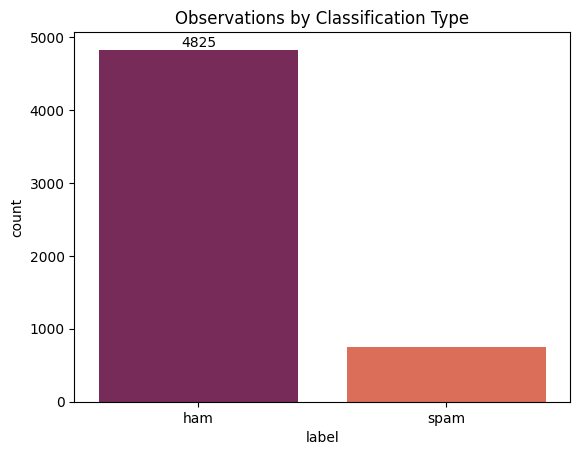

In [54]:
import seaborn as sns
# count plot on single categorical variable
ax = sns.countplot(x = df['label'], palette = 'rocket', hue = df['label'])

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

#### Evaluation Metrics
In such cases, [Precision and Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall) are better measures. Before explaining what these two measures are, we need to understand some term:

1. **True Positives (TP)**:  
   These are the cases where the model predicts the positive class, and the actual label is also positive.

2. **False Positives (FP)**:  
   These are the cases where the model predicts the positive class, but the actual label is negative. In other words, the model incorrectly identifies instances as belonging to the positive class when they actually belong to the negative class.

3. **True Negatives (TN)**:  
   These are the cases where the model predicts the negative class, and the actual label is also negative.

4. **False Negatives (FN)**:  
   These are the cases where the model predicts the negative class, but the actual label is positive. In other words, the model incorrectly identifies instances as belonging to the negative class when they actually belong to the positive class.

These are usually summed up in a confusion matrix

|              | Predicted Positive | Predicted Negative |
|--------------|--------------------|--------------------|
| Actual Positive | TP                 | FP                 |
| Actual Negative | FN                 | TN                 |



**Accuracy** 

Accuracy measures the proportion of correctly classified instances out of the total instances.

It's calculated as:
$$ Accuracy = \frac {Number \ of \ Correct \ Predictions}{Total \ Number \ of \ Predictions} $$

OR

$$ Accuracy = \frac {TP+TN}{TP+TN+FP+FN} $$
​

**Precision**

Precision measures the proportion of true positive predictions out of all positive predictions made by the model. It attempts to answer the following question:

`What proportion of positive identifications was actually correct?`

It is defined as 
$$Precision = \frac {TP}{TP+FP}$$

**Recall (sensitivity)**

Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset. It try to answer the question:

`What proportion of actual positives was identified correctly?`

It is defined as

$$Recall = \frac {TP}{TP+FN}$$

In slightly imbalanced datasets, using accuracy and precision is enough; however, in highly imbalanced (such as the one we are using) this is not the case.

To fully evaluate the effectiveness of a model, you must examine **both** precision and recall. Unfortunately, precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa. For that, we can use the F1-score.

**F1-score**

F1-score is the harmonic mean of precision and recall, it is useful when you want to seek a balance between precision and recall.

It's calculated as:

$$ F1 = 2 \times \frac {Precision \times Recall}{Precision + Recall} $$

Accuracy score:  99.01 %
Precision score:  97.89 %
Recall score:  94.56 %
F1 score:  96.19 %


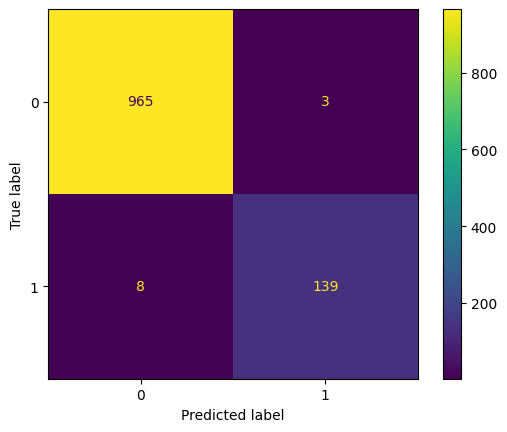

In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

print('Precision score: ', format(round(100*precision_score(y_test, predictions),2)),'%')
print('Recall score: ',format(round(100*recall_score(y_test, predictions),2)),'%')
print('F1 score: ', format(round(100*f1_score(y_test, predictions),2)),'%')

#evaluate model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
    

#compute the confusion matrix.
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
disp.plot()
plt.show()

From this we can conclude that our classifier is actually well trained as it has scores across all metrics. 

### Real-life example

Now let's test it on one spam emails I received

<img src='spam message.jpg' width="300">

In [62]:
spam_text = [
    'You won $750,000.00 from Samsung.send your address to samsungdept323@gmail.com',
    'THE RED WEEK IS BACK with BIG discounts!\
        \nCampomatic TV 32"+DVD@$129 Vacuum 2000W @$49\
        \nCampomatic AC 10000 BTU @$279 all TTC\
        \n Visit out branches or kaystore.com',
    'Dear Haitham,\
    I hope this email finds you well. I am pleased to inform you that after a thorough evaluation of your qualifications and interviews, we are delighted to extend a job offer for the Data & ML Engineer role at Okation.ai.'
    
]

prediction = naive_bayes.predict(count_vector.transform(spam_text))
print(prediction)

[1 1 0]
